In [194]:
import pickle
import os
import re
import copy
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import json
import spacy
import Topic_modeling
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [162]:
import Topic_modeling

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

import pandas as pd
import numpy as np

from gensim.models import Word2Vec
import gensim, logging


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer

OMP_NUM_THREADS=1

## first topic 

In [163]:
df = pd.read_csv('final_with_sic.csv', index_col = [0])

In [164]:
df.head()

In [ ]:
#corpus = "".join(df['text'].astype('str').tolist())

In [ ]:
#df['text'].to_excel('corpus.xlsx')

In [168]:
everything = Topic_modeling.Topic_modeling('corpse.xls', 'everything') # xlsx converted in xls

In [169]:
everything.preprocess()

Nº topics: 2
Score: 0.4912615227239024
Nº topics: 3
Score: 0.5734403829355945
Nº topics: 4
Score: 0.5594887284648866
Nº topics: 5
Score: 0.5141428581180649
Nº topics: 6
Score: 0.531312505237996
Nº topics: 7
Score: 0.5382878708326783
Nº topics: 8
Score: 0.5218121997027392
Nº topics: 9
Score: 0.5385673400632359
Nº topics: 10
Score: 0.49861621682018226
Nº topics: 11
Score: 0.5352068334969823
Nº topics: 12
Score: 0.4738068551938022
Nº topics: 13
Score: 0.5256431699203286
Nº topics: 14
Score: 0.4638442026303201


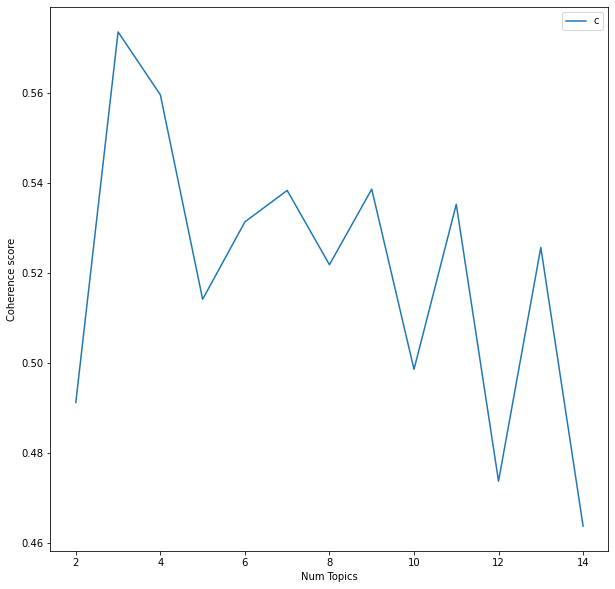

The best model has 3 topics


In [170]:
everything.modeling()

In [171]:
everything.save_html_lda()

In [172]:
#len(everything.data_lemmatized)

In [173]:
print('\nPerplexity: ', everything.lda_model.log_perplexity(everything.corpus))  # a measure of how good the model is. lower the better.



Perplexity:  -10.223083345735944


In [185]:
everything.lda_model[everything.corpus]
print(everything.lda_model.print_topics(30))

[(0, '0.025*"transport" + 0.025*"production" + 0.022*"english" + 0.019*"accommodation" + 0.015*"offer" + 0.012*"expece" + 0.012*"require" + 0.011*"contact" + 0.009*"change" + 0.009*"shift"'), (1, '0.031*"english" + 0.022*"transport" + 0.020*"accommodation" + 0.017*"expece" + 0.016*"language" + 0.014*"wijk" + 0.013*"dutch" + 0.012*"must" + 0.012*"require" + 0.012*"offer"'), (2, '0.019*"offer" + 0.018*"hour" + 0.015*"expece" + 0.013*"accommodation" + 0.012*"dutch" + 0.012*"english" + 0.009*"apply" + 0.009*"warehouse" + 0.009*"start" + 0.009*"salary"')]


In [192]:
print(everything.lda_model.print_topics(3,30))

[(0, '0.025*"transport" + 0.025*"production" + 0.022*"english" + 0.019*"accommodation" + 0.015*"offer" + 0.012*"expece" + 0.012*"require" + 0.011*"contact" + 0.009*"change" + 0.009*"shift" + 0.009*"company" + 0.008*"knowledge" + 0.008*"welcome" + 0.007*"range" + 0.007*"dutch" + 0.006*"wijk" + 0.006*"call" + 0.006*"kilburn" + 0.006*"worker" + 0.006*"warehouse" + 0.006*"hour" + 0.006*"must" + 0.005*"salary" + 0.005*"send" + 0.005*"pack" + 0.005*"car" + 0.005*"time" + 0.005*"also" + 0.005*"good" + 0.005*"system"'), (1, '0.031*"english" + 0.022*"transport" + 0.020*"accommodation" + 0.017*"expece" + 0.016*"language" + 0.014*"wijk" + 0.013*"dutch" + 0.012*"must" + 0.012*"require" + 0.012*"offer" + 0.011*"contact" + 0.010*"start" + 0.009*"apply" + 0.008*"change" + 0.007*"hour" + 0.007*"call" + 0.007*"range" + 0.007*"production" + 0.006*"kilburn" + 0.006*"car" + 0.006*"knowledge" + 0.006*"salary" + 0.006*"inter" + 0.005*"return" + 0.005*"good" + 0.005*"also" + 0.004*"eur" + 0.004*"company" + 0

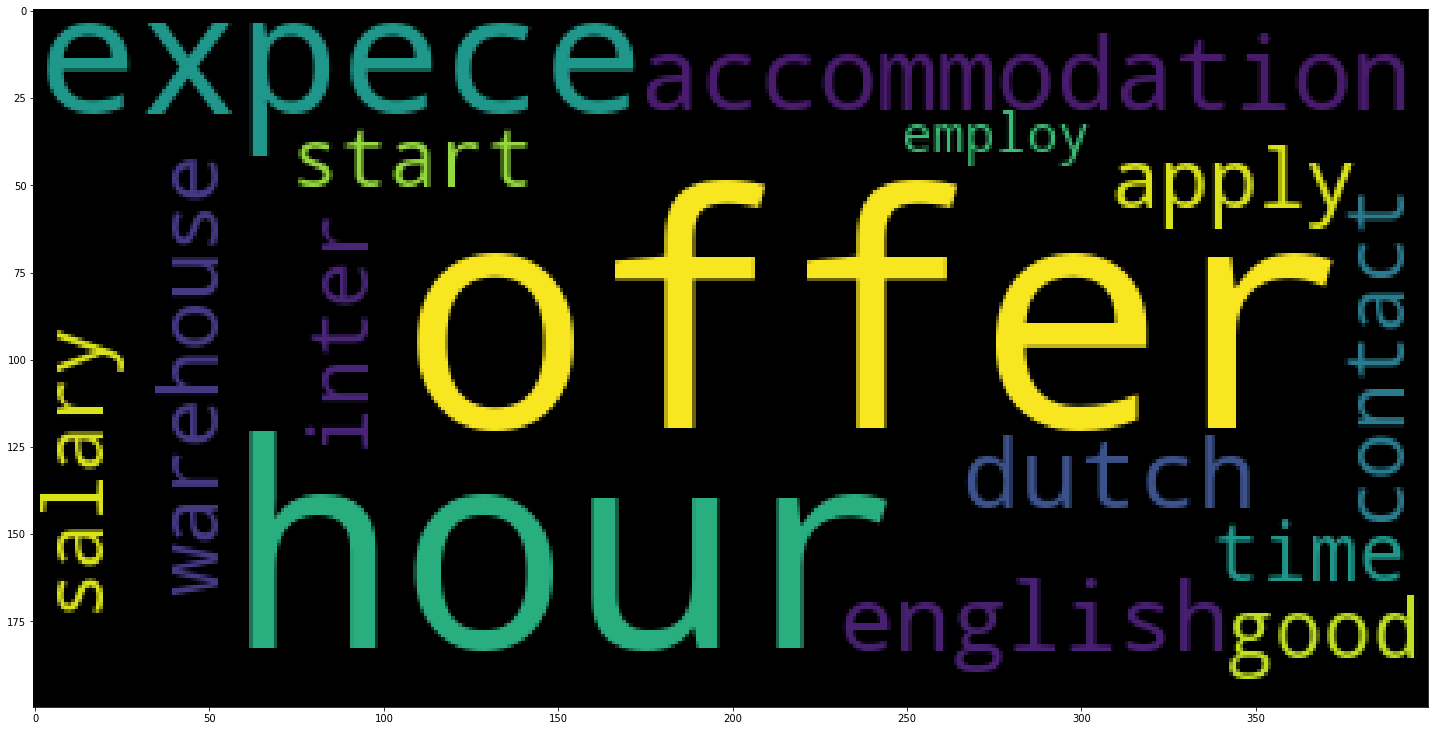

In [204]:
plt.imshow(WordCloud().fit_words(dict(everything.lda_model.show_topic(2, 15))))

In [175]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(everything.lda_model[everything.corpus]):
        for j,n in enumerate(row):
            if j == 0:
                dom_topic = sorted(row[0], key=lambda x: (x[1]), reverse=True)[0]
                sent_topics_df = sent_topics_df.append(pd.Series([int(dom_topic[0]), round(dom_topic[1],4)]), ignore_index=True)
            else:
                break
        
    sent_topics_df.columns = ['Dominant_Topic','Perc_Contribution']


    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [176]:
lda_df = format_topics_sentences(everything.lda_model,everything.corpus,df['text'])

In [177]:
lda_df['time'] = df['time']
lda_df['text_language'] = df['text_language']
lda_df['salary'] = df['salary']
lda_df['job_type'] = df['job_type']
lda_df['phone_contact'] = df['phone_number']
lda_df['external_url'] = df['external_url']

In [178]:
plt.rcParams["figure.figsize"] = (25,25)
data = [everything.data_lemmatized]
data_name = ['everything']
min_count = [5,10]
# Optimal between 5-50
perplexity = [5,10,20]
for data_idx in range(len(data)):
    for c in min_count:
        # Selective model, minimum number of times a word appears = min_count
        model = Word2Vec(data[data_idx], min_count=c)
        print (data_name[data_idx])
        X = model[model.wv.vocab]

        # Creating PCA with 2 components and exporting the plot figure
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        
        

        plt.scatter(result[:, 0], result[:, 1])
        words = list(model.wv.vocab)
        for i, word in enumerate(words):
            plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        plt.savefig('PCA_{}_{}.png'.format(data_name[data_idx],c), format='png')
        plt.close()
        # Creating TSNE with 2 components and different perplexity
        for p in perplexity:
            tsne = TSNE(n_components=2, perplexity=5)
            result = tsne.fit_transform(X)
            plt.scatter(result[:, 0], result[:, 1])
            words = list(model.wv.vocab)
            for i, word in enumerate(words):
                plt.annotate(word, xy=(result[i, 0], result[i, 1]))
            plt.savefig('TSNE_{}_{}_{}.png'.format(data_name[data_idx],c, p), format='png')
            plt.close()

everything


C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\david\anacon

everything


C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\david\anacon

In [179]:
### Using kmapper to create a 2D topology based on the word2vec extraction

In [180]:
#model = Word2Vec(best_practices.data_lemmatized)
model = Word2Vec(everything.data_lemmatized)
X = model[model.wv.vocab]
words = list(model.wv.vocab)

In [181]:
# Import the class
import kmapper as km
from sklearn import cluster

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(X, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, X, clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"))

# Visualize it
mapper.visualize(graph, path_html="Visualizations/word2vec_top_analysis.html", X =X, X_names = words,
                 title="Topological analysis word2vec");

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (2140, 100)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (2140, 100) using lens shaped (2140, 2)

Creating 100 hypercubes.

Created 106 edges and 105 nodes in 0:00:00.072068.
Wrote visualization to: Visualizations/word2vec_top_analysis.html


# LSI Model

In [19]:
# temporary import 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk 
nltk.download('wordnet')
nltk.download('punkt')
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [214]:
def compute_coherence_values(corpus, dictionary, texts, end, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    model = []
    for num_topics in range(start, end, step):
    
        lsi_model = gensim.models.LsiModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               decay = 0.5,
                                               #random_state=123,
                                               chunksize=10)
    
        model.append(lsi_model)
        # Compute Coherence Score
        coherence_model_lsi = CoherenceModel(model=lsi_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model_lsi.get_coherence())

    return model,model_list, coherence_values

In [215]:
model, model_list, coherence_values = compute_coherence_values(corpus=everything.corpus, dictionary = everything.id2word,
                                                        texts=everything.data_lemmatized, start=2, end=15, step=1)

In [341]:
#coherence_values

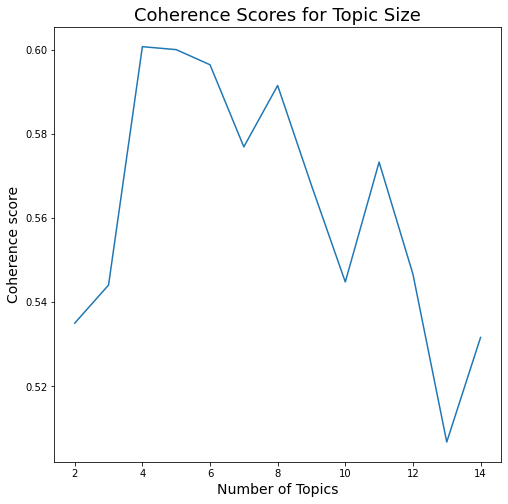

In [217]:
# Show graph
end=15; start=2; step=1;
x = range(start, end, step)
ax = plt.subplots(figsize=(8,8))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics", fontsize=14)
plt.ylabel("Coherence score", fontsize=14)
plt.title('Coherence Scores for Topic Size', fontsize=18)
plt.show();

In [234]:
model[3].print_topic(3,15)

'0.287*"english" + 0.231*"hotel" + 0.226*"start" + 0.221*"pay" + 0.209*"language" + 0.192*"contact" + 0.177*"accommodation" + 0.171*"clean" + 0.171*"immediately" + 0.171*"cleanlis" + 0.171*"legal" + 0.170*"transport" + 0.129*"employer" + 0.124*"holiday" + 0.120*"alga"'

In [227]:
from pprint import pprint
# Print the Keyword in the 10 topics
for i in range(1,12):
    print(model[3].print_topic(i, topn=15))
#pprint(model_list[5].print_debug(num_topics=5, num_words=10))
#doc_lda = model_list[5][corpus]

0.362*"worker" + 0.349*"offer" + 0.285*"production" + -0.229*"http" + 0.205*"check" + -0.153*"ept" + 0.146*"hotel" + -0.145*"operator" + 0.132*"send" + 0.124*"industrial" + 0.123*"new" + 0.122*"logistic" + 0.121*"give" + 0.121*"henry" + 0.120*"painter"
-0.291*"system" + -0.291*"electrical" + -0.194*"english" + -0.184*"expece" + -0.171*"call" + -0.168*"rate" + -0.164*"speak" + -0.164*"patrycjaw" + -0.163*"change" + -0.163*"end" + -0.157*"company" + -0.156*"morning" + -0.154*"jeune" + -0.153*"inter" + -0.146*"drawing"
0.287*"english" + 0.231*"hotel" + 0.226*"start" + 0.221*"pay" + 0.209*"language" + 0.192*"contact" + 0.177*"accommodation" + 0.171*"clean" + 0.171*"immediately" + 0.171*"cleanlis" + 0.171*"legal" + 0.170*"transport" + 0.129*"employer" + 0.124*"holiday" + 0.120*"alga"
-0.241*"alga" + -0.236*"uab" + 0.231*"hotel" + -0.186*"start" + -0.182*"wkly" + -0.177*"warehouse" + -0.173*"contact" + -0.161*"olga" + -0.161*"language" + -0.156*"region" + 0.155*"legal" + 0.155*"cleanlis" + 0

In [96]:
format_topics_sentences(model[0],everything.corpus,df['text'])

,Dominant_Topic,Perc_Contribution,text
0,2.0,0.7493,t you branch for sharing this nice update of y...
1,1.0,0.7896,go sobs h can h you with the jobs good accomm...
2,1.0,0.6773,flowerfriday at ago jobs h and we l ve it this...
3,1.0,0.5563,flowerfriday at ago jobs h and we l ve it this...
4,2.0,0.9502,are you passionate about trunks and do you hav...
...,...,...,...
2868,0.0,0.9156,work in operator reruck and heftruck only exp...
2869,1.0,0.5434,check our job offer for ting device operators ...
2870,0.0,0.6248,new job offers in w check now and apply work f...
2871,0.0,0.9232,are you king for a job as an ept driver and ma...


# Regression analysis

In [294]:
len(lda_df)

2873

In [295]:
lda_df.columns

Index(['Dominant_Topic', 'Perc_Contribution', 'text', 'time', 'text_language',
       'salary', 'job_type', 'phone_contact', 'external_url'],
      dtype='object')

In [296]:
import glob
import pandas as pd

# get data file names
path =r'C:\Users\david\OneDrive\Documents\thesis\dataset\stats'
filenames = glob.glob(path + "/*.csv")
    
dfs = []
for filename in filenames:
    print(filename)
    dfs.append(pd.read_csv(filename, sep = ';', decimal=','))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032557.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032632.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032638.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032646.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032653.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032700.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032711.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032722.csv
C:\Users\david\OneDrive\Documents\thesis\dataset\stats\Employment__key_figures_25112021_032730.csv


In [297]:
stats_df = pd.DataFrame()
stats_df['time'] = big_frame['Periods']
stats_df['class'] = big_frame['Industrial classes / branches (SIC2008)']
stats_df['salary'] = big_frame['Wage per job/Hourly wage (euro)']

In [298]:
stats_df['class'].value_counts()

M Other specialised business services    8
H Transportation and storage             8
I Accommodation and food serving         8
G Wholesale and retail trade             8
A-U All economic activities              8
A Agriculture, forestry and fishing      8
S Other service activities               8
F Construction                           8
C Manufacturing                          8
Name: class, dtype: int64

In [299]:
regr_df = pd.DataFrame()
regr_df['Topic'] = lda_df['Dominant_Topic']
regr_df['time'] = lda_df['time']
regr_df['text_language'] = lda_df['text_language']
regr_df['job_type'] = lda_df['job_type']
regr_df['external_url'] = lda_df['external_url']
regr_df['phone_contact'] = lda_df['phone_contact']
regr_df['delta_salary'] = lda_df['salary']

In [300]:
regr_df.head()

,Topic,time,text_language,job_type,external_url,phone_contact,delta_salary
0,2.0,2021,en,"A Agriculture, forestry and fishing",yes,no,NaN
1,1.0,2021,en,"A Agriculture, forestry and fishing",yes,yes,NaN
2,1.0,2021,en,"A Agriculture, forestry and fishing",yes,no,NaN
3,1.0,2021,en,"A Agriculture, forestry and fishing",yes,no,NaN
4,2.0,2021,en,G Wholesale and retail trade,yes,no,NaN


In [301]:
regr_df.dropna(subset = ["delta_salary"], inplace=True)

In [302]:
for index,row in regr_df.iterrows():
    for ind,val in stats_df.iterrows():
        if row['time'] == val['time'] and row['job_type'] == val['class']:
            delta = row['delta_salary'] - val['salary']
            regr_df.loc[index, 'delta_salary'] = delta

In [303]:
regr_df[regr_df['Topic'] == 6.0].groupby('job_type')['delta_salary'].mean()

Series([], Name: delta_salary, dtype: float64)

In [304]:
regr_df.loc[regr_df['delta_salary'] > 0, 'delta_salary'] = 1

In [305]:
regr_df.loc[regr_df['delta_salary'] < 0, 'delta_salary'] = 0

In [306]:
regr_df['delta_salary'].value_counts()

0.0    888
1.0    376
Name: delta_salary, dtype: int64

In [307]:
#regr_df['Topic']  = regr_df['Topic'].astype(int)
regr_df['delta_salary']  = regr_df['delta_salary'].astype(int)

In [308]:
regr_df.columns

Index(['Topic', 'time', 'text_language', 'job_type', 'external_url',
       'phone_contact', 'delta_salary'],
      dtype='object')

In [309]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [310]:
cat_vars=['Topic','text_language',
 'job_type',
 'external_url',
 'phone_contact'] #
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(regr_df[var], prefix=var)
    data1=regr_df.join(cat_list)
    regr_df=data1
cat_vars=['Topic','text_language',
 'job_type',
 'external_url',
 'phone_contact',] 
data_vars=regr_df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [311]:
len(data_vars)

30

In [312]:
regr_df.corr()

,Topic,time,delta_salary,Topic_0.0,Topic_1.0,Topic_2.0,text_language_af,text_language_en,text_language_lt,text_language_nl,...,job_type_G Wholesale and retail trade,job_type_H Transportation and storage,job_type_I Accommodation and food serving,job_type_M Other specialised business services,job_type_None,job_type_S Other service activities,external_url_no,external_url_yes,phone_contact_no,phone_contact_yes
Topic,1.000000,-0.118277,0.204621,-0.878730,-0.007263,0.880295,-0.000636,0.312963,0.032575,0.018324,...,0.060750,-0.017677,0.032864,-0.011575,0.005570,0.062706,-0.296009,0.296009,0.044793,-0.044793
time,-0.118277,1.000000,0.196712,0.019817,0.177080,-0.187724,0.057063,0.054812,-0.125394,0.002940,...,0.027623,0.051139,0.016602,-0.010182,0.066638,-0.080564,0.323832,-0.323832,0.105987,-0.105987
delta_salary,0.204621,0.196712,1.000000,-0.229420,0.102452,0.130815,0.055775,0.055871,0.321829,-0.014911,...,-0.010193,0.160559,-0.005851,-0.081230,0.369278,-0.058108,-0.027447,0.027447,0.014879,-0.014879
Topic_0.0,-0.878730,0.019817,-0.229420,1.000000,-0.470925,-0.547089,-0.041244,-0.198154,-0.095129,-0.091689,...,-0.060062,0.021106,-0.011691,-0.036607,-0.058991,-0.027897,0.117840,-0.117840,-0.069554,0.069554
Topic_1.0,-0.007263,0.177080,0.102452,-0.470925,1.000000,-0.480807,0.087582,-0.163283,0.139089,0.158220,...,0.013552,-0.011545,-0.036247,0.098083,0.113291,-0.057449,0.300207,-0.300207,0.062928,-0.062928
Topic_2.0,0.880295,-0.187724,0.130815,-0.547089,-0.480807,1.000000,-0.042110,0.351889,-0.037425,-0.058998,...,0.046839,-0.010022,0.046014,-0.056683,-0.048866,0.082240,-0.401985,0.401985,0.009422,-0.009422
text_language_af,-0.000636,0.057063,0.055775,-0.041244,0.087582,-0.042110,1.000000,-0.037428,-0.012688,-0.013330,...,-0.023845,-0.025150,-0.003175,-0.012131,0.172475,-0.005031,0.063073,-0.063073,0.016693,-0.016693
text_language_en,0.312963,0.054812,0.055871,-0.198154,-0.163283,0.351889,-0.037428,1.000000,-0.149585,-0.157161,...,-0.065924,0.113928,0.084818,-0.101317,0.006605,-0.001196,-0.185741,0.185741,0.039259,-0.039259
text_language_lt,0.032575,-0.125394,0.321829,-0.095129,0.139089,-0.037425,-0.012688,-0.149585,1.000000,-0.053275,...,0.007551,-0.080677,-0.012688,-0.048483,-0.054109,-0.020109,-0.052557,0.052557,0.066716,-0.066716
text_language_nl,0.018324,0.002940,-0.014911,-0.091689,0.158220,-0.058998,-0.013330,-0.157161,-0.053275,1.000000,...,0.017933,0.027215,-0.013330,0.017704,0.005325,0.018731,0.144018,-0.144018,0.005272,-0.005272


In [313]:
data_final=regr_df[to_keep]
data_final.columns.values

array(['time', 'delta_salary', 'Topic_0.0', 'Topic_1.0', 'Topic_2.0',
       'text_language_af', 'text_language_en', 'text_language_lt',
       'text_language_nl', 'text_language_pl', 'text_language_pt',
       'text_language_ro', 'job_type_A Agriculture, forestry and fishing',
       'job_type_C Manufacturing', 'job_type_F Construction',
       'job_type_G Wholesale and retail trade',
       'job_type_H Transportation and storage',
       'job_type_I Accommodation and food serving',
       'job_type_M Other specialised business services', 'job_type_None',
       'job_type_S Other service activities', 'external_url_no',
       'external_url_yes', 'phone_contact_no', 'phone_contact_yes'],
      dtype=object)

In [314]:
data_final

,time,delta_salary,Topic_0.0,Topic_1.0,Topic_2.0,text_language_af,text_language_en,text_language_lt,text_language_nl,text_language_pl,...,job_type_G Wholesale and retail trade,job_type_H Transportation and storage,job_type_I Accommodation and food serving,job_type_M Other specialised business services,job_type_None,job_type_S Other service activities,external_url_no,external_url_yes,phone_contact_no,phone_contact_yes
1609,2021,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1610,2021,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1611,2021,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1612,2021,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1613,2021,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2019,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2869,2020,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2870,2021,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
2871,2021,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [315]:
# del data_final['external_url_no']

In [316]:
data_final.columns.values

array(['time', 'delta_salary', 'Topic_0.0', 'Topic_1.0', 'Topic_2.0',
       'text_language_af', 'text_language_en', 'text_language_lt',
       'text_language_nl', 'text_language_pl', 'text_language_pt',
       'text_language_ro', 'job_type_A Agriculture, forestry and fishing',
       'job_type_C Manufacturing', 'job_type_F Construction',
       'job_type_G Wholesale and retail trade',
       'job_type_H Transportation and storage',
       'job_type_I Accommodation and food serving',
       'job_type_M Other specialised business services', 'job_type_None',
       'job_type_S Other service activities', 'external_url_no',
       'external_url_yes', 'phone_contact_no', 'phone_contact_yes'],
      dtype=object)

In [317]:
X = data_final.loc[:, data_final.columns != 'delta_salary']
y = data_final.loc[:, data_final.columns == 'delta_salary']
# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# columns = X_train.columns
# logisticRegr = LogisticRegression()
# logisticRegr.fit(X_train, y_train)

In [318]:
data_final_vars=data_final.columns.values.tolist()
y=['delta_salary']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=14)
rfe = rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

[False  True False False False  True  True  True  True False  True  True
  True  True  True  True False  True  True  True False False False False]
[11  1  4  5 10  1  1  1  1  2  1  1  1  1  1  1  3  1  1  1  8  9  7  6]


C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\david\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [319]:
cols = list(rfe.get_feature_names_out(X))

In [320]:
cols

['Topic_0.0',
 'text_language_en',
 'text_language_lt',
 'text_language_nl',
 'text_language_pl',
 'text_language_ro',
 'job_type_A Agriculture, forestry and fishing',
 'job_type_C Manufacturing',
 'job_type_F Construction',
 'job_type_G Wholesale and retail trade',
 'job_type_H Transportation and storage',
 'job_type_M Other specialised business services',
 'job_type_None',
 'job_type_S Other service activities']

In [321]:
X=x_train[cols]
y=y_train['delta_salary']

In [322]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.367226
         Iterations: 35
                                              Results: Logit
Model:                             Logit                         Pseudo R-squared:              0.386     
Dependent Variable:                delta_salary                  AIC:                           677.2561  
Date:                              2022-01-06 11:22              BIC:                           744.2385  
No. Observations:                  884                           Log-Likelihood:                -324.63   
Df Model:                          13                            LL-Null:                       -528.35   
Df Residuals:                      870                           LLR p-value:                   6.0086e-79
Converged:                         0.0000                        Scale:                         1.0000    
No. Iterations:                    35.0000                                                                
-----------------

C:\Users\david\anaconda3\envs\thesis\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


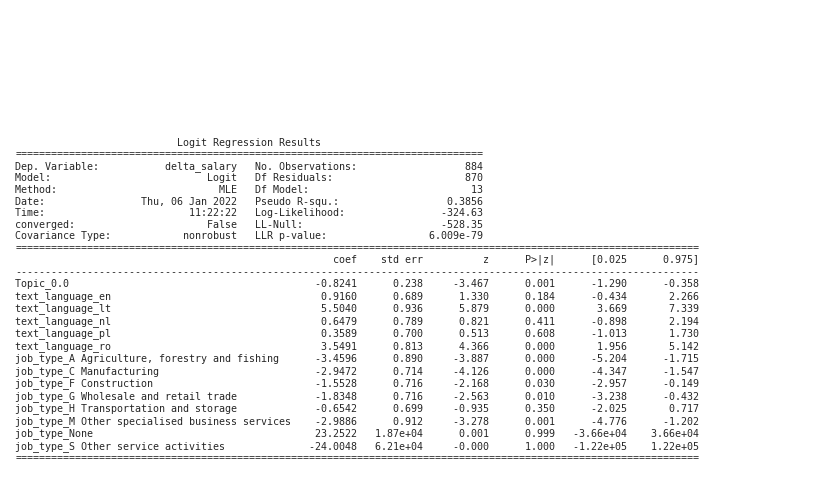

In [323]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output1.png')

In [324]:
cols=[ 'Topic_0.0',                                   
    'text_language_lt',
 'text_language_pl',
 'text_language_ro',
 'job_type_A Agriculture, forestry and fishing',
 'job_type_C Manufacturing',
 'job_type_M Other specialised business services'] 
X=x_train[cols]
y=y_train['delta_salary']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.440438
         Iterations 7
                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.263     
Dependent Variable:            delta_salary              AIC:                       792.6935  
Date:                          2022-01-06 11:22          BIC:                       826.1847  
No. Observations:              884                       Log-Likelihood:            -389.35   
Df Model:                      6                         LL-Null:                   -528.35   
Df Residuals:                  877                       LLR p-value:               4.2143e-57
Converged:                     1.0000                    Scale:                     1.0000    
No. Iterations:                7.0000                                                         
-----------------------------------------------------------------------------------

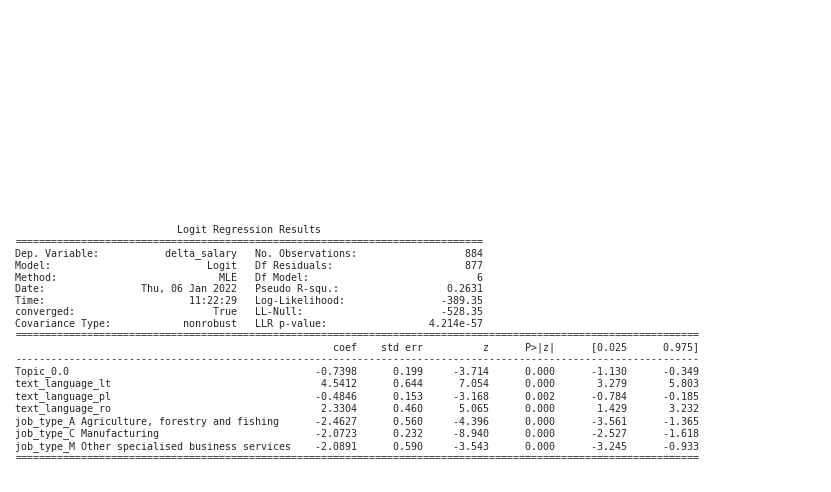

In [325]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output2.png')

In [326]:
cols=[                                 
    'text_language_lt',
 'text_language_pl',
 'text_language_ro',
 'job_type_A Agriculture, forestry and fishing',
 'job_type_C Manufacturing',
 'job_type_M Other specialised business services'] 
X=x_train[cols]
y=y_train['delta_salary']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.448641
         Iterations 7
                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.249     
Dependent Variable:            delta_salary              AIC:                       805.1971  
Date:                          2022-01-06 11:22          BIC:                       833.9038  
No. Observations:              884                       Log-Likelihood:            -396.60   
Df Model:                      5                         LL-Null:                   -528.35   
Df Residuals:                  878                       LLR p-value:               6.9791e-55
Converged:                     1.0000                    Scale:                     1.0000    
No. Iterations:                7.0000                                                         
-----------------------------------------------------------------------------------

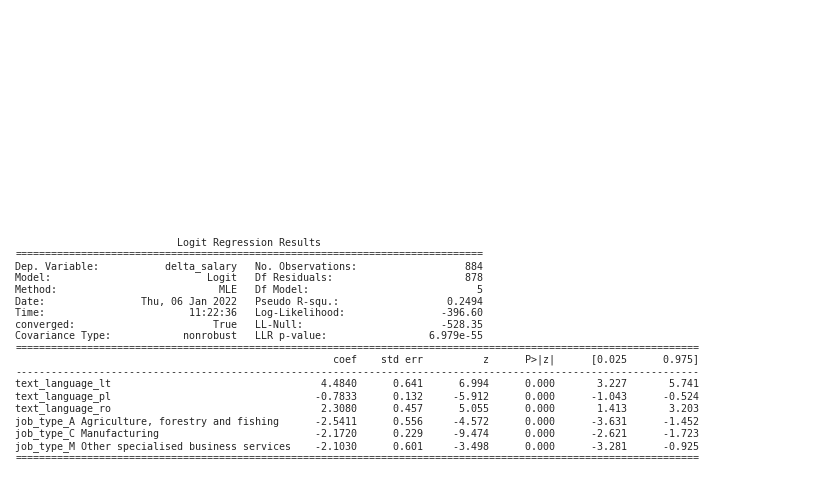

In [327]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output3.png')

In [332]:
X_test

,text_language_lt,text_language_pl,text_language_ro,"job_type_A Agriculture, forestry and fishing",job_type_C Manufacturing,job_type_M Other specialised business services
2440,0,0,0,0,0,0
2319,0,1,0,0,1,0
2846,1,0,0,1,0,0
1781,0,0,0,0,1,0
2463,0,0,0,0,1,0
...,...,...,...,...,...,...
2359,0,0,0,0,0,0
2674,0,1,0,0,1,0
2797,0,0,0,0,0,0
1821,0,0,0,0,1,0


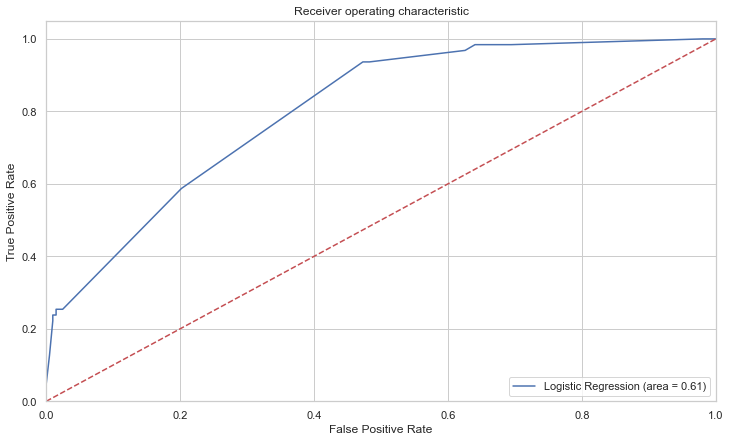

In [333]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [339]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
statsmodels.stats.stattools.durbin_watson(result.resid_generalized)

1.9424199868253385

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [336]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [337]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[198   5]
 [ 47  16]]


In [338]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       203
           1       0.76      0.25      0.38        63

    accuracy                           0.80       266
   macro avg       0.79      0.61      0.63       266
weighted avg       0.80      0.80      0.76       266



In [160]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import metrics

In [161]:
# cm = metrics.confusion_matrix(y_test, predictions)
# print(cm)